In [ ]:
pip install pandas

In [ ]:
pip install plotly

In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Marmara2024_PrX.csv",sep=",")

In [ ]:
 Marmara2024_PrX = df
 Marmara2024_PrX.head()

,Time,Longitude,Latitude,Depth,Magnitude
0,4/5/2025 11:04,29.4372,40.2597,6.92,2.0
1,4/4/2025 2:41,30.1803,40.1222,7.00,2.5
2,4/3/2025 5:55,26.0861,40.0633,10.62,2.1
3,4/2/2025 9:31,27.3711,40.3019,6.96,2.4
4,3/29/2025 2:24,28.9925,40.4167,6.16,2.4


In [ ]:
Marmara2024_PrX.shape

(239, 5)

In [ ]:
x = Marmara2024_PrX.iloc[:,1].values
y = Marmara2024_PrX.iloc[:,2].values
z = Marmara2024_PrX.iloc[:,3].values
colors = Marmara2024_PrX.iloc[:,4].values
sizes = Marmara2024_PrX.iloc[:,4].values*40

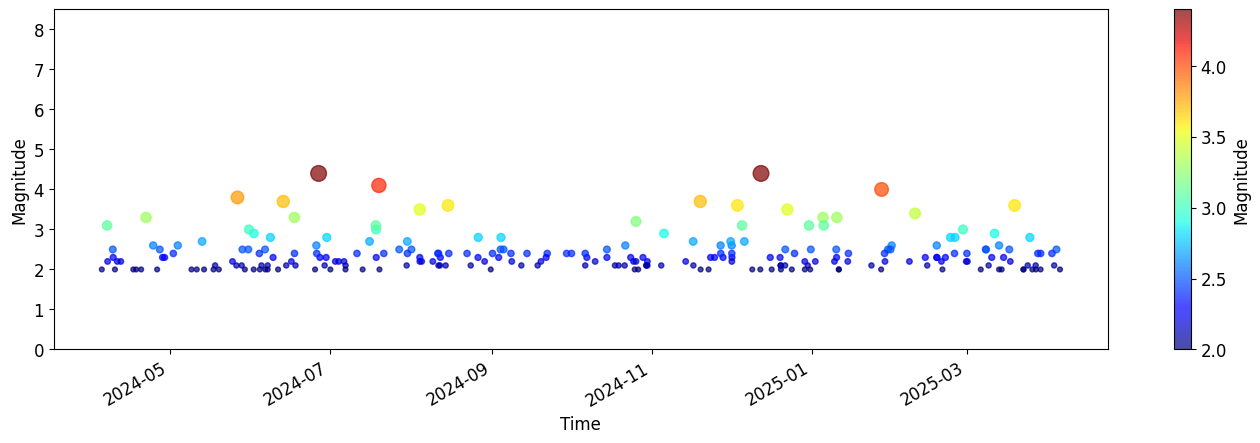

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Marmara2024_PrX veri setinden 'Time' ve 'Magnitude' bilgilerini çekiyoruz
data = pd.DataFrame({
    'Time': pd.to_datetime(Marmara2024_PrX.iloc[:, 0]),  # Tarih ve saat sütunu
    'Magnitude': Marmara2024_PrX.iloc[:, 4].values
})

# Grafik çizimi
plt.figure(figsize=(17, 5))
scatter = plt.scatter(
    data['Time'], data['Magnitude'],
    c=data['Magnitude'], cmap='jet',
    s=data['Magnitude']**3 * 1.5,  # Büyüklüğe göre nokta büyüklüğü
    alpha=0.7
)

plt.colorbar(scatter, label='Magnitude')  # Renk barı ekliyoruz
plt.xlabel('Time')  # x-ekseni: Zaman
plt.ylabel('Magnitude')  # y-ekseni: Büyüklük
plt.rc('font', size=12)
plt.ylim(0, 8.5)

# x-ekseni tarih formatını güzelleştir
plt.gcf().autofmt_xdate()

plt.show()


Invalid dates found: 0
                   Time  Magnitude  time_numeric   b-value
0   2025-04-05 11:04:00        2.0  1.743851e+09  1.737178
1   2025-04-04 02:41:00        2.5  1.743734e+09  1.793443
2   2025-04-03 05:55:00        2.1  1.743660e+09  1.836042
3   2025-04-02 09:31:00        2.4  1.743586e+09  1.834072
4   2025-03-29 02:24:00        2.4  1.743215e+09  1.861262
..                  ...        ...           ...       ...
234 2024-04-09 08:43:00        2.5  1.712652e+09  2.142260
235 2024-04-09 12:24:00        2.3  1.712665e+09  2.151551
236 2024-04-07 09:03:00        2.2  1.712481e+09  2.202642
237 2024-04-07 04:22:00        3.1  1.712464e+09  2.130501
238 2024-04-05 04:16:00        2.0  1.712291e+09  2.079720

[239 rows x 4 columns]


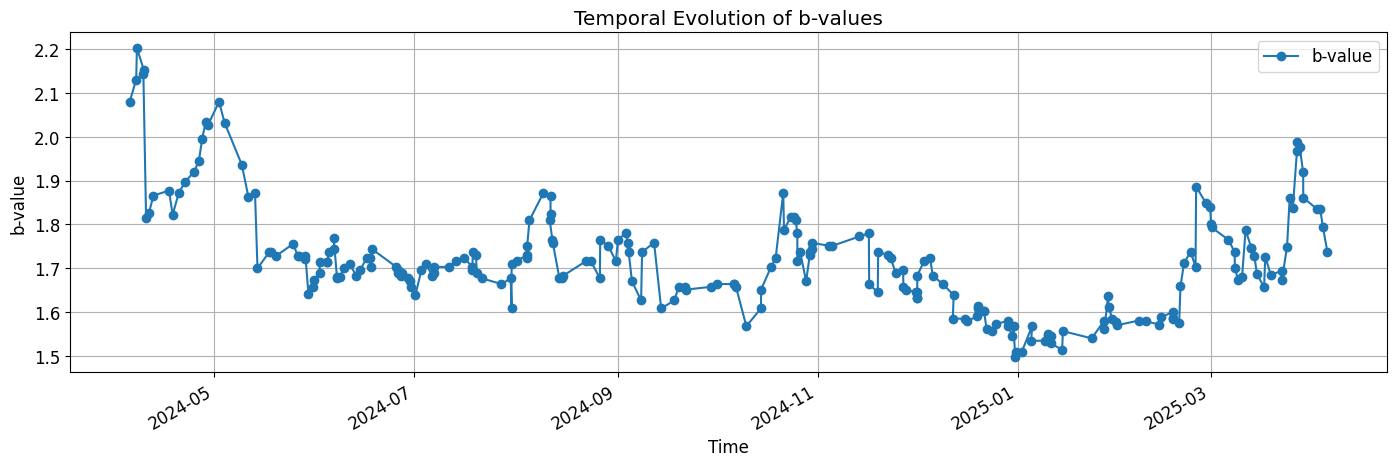

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to compute b-value
def compute_b_value(magnitudes, mc, bin_width=0.1):
    """
    Compute the b-value using the Maximum Likelihood Estimation (MLE) method.
    """
    if len(magnitudes) > 0:
        mean_mag = np.mean(magnitudes)
        b_value = (1 / np.log(10)) / (mean_mag - mc + (bin_width / 2))
    else:
        b_value = np.nan
    return b_value

# Function to calculate b-value for each earthquake
def b_value_for_each_earthquake(times, magnitudes, window_size=100):
    """
    Calculate b-value for each earthquake using a sliding window.

    Parameters:
        times (list or array): Timestamps of earthquakes.
        magnitudes (list or array): Magnitudes of earthquakes.
        window_size (int): Number of earthquakes in each window.

    Returns:
        b_values (list): b-values calculated for each earthquake.
    """
    b_values = []

    for i in range(len(magnitudes)):
        # Define the window around the current earthquake
        start = max(0, i - window_size // 2)
        end = min(len(magnitudes), i + window_size // 2)

        window_magnitudes = magnitudes[start:end]

        # Calculate Mc, ensuring it is at least 2
        mc = max(2, np.min(window_magnitudes)) + 0.2

        # Compute b-value
        b_value = compute_b_value(window_magnitudes, mc)
        b_values.append(b_value)

    return b_values

# Assuming your DataFrame is already defined as Marmara2024_PrX
data = pd.DataFrame({
    'Time': Marmara2024_PrX.iloc[:, 0].values,
    'Magnitude': Marmara2024_PrX.iloc[:, 4].values
})

# Convert 'Time' column to datetime with month/day/year and hour:minute format
data["Time"] = pd.to_datetime(data["Time"], format="%m/%d/%Y %H:%M", errors='coerce')

# Check for any invalid or missing dates
print("Invalid dates found:", data["Time"].isna().sum())

# Convert to numeric timestamp for b-value calculation
data["time_numeric"] = data["Time"].apply(lambda x: x.timestamp())

# Calculate b-values for each earthquake
b_values = b_value_for_each_earthquake(
    data["time_numeric"].values,
    data["Magnitude"].values
)

# Add b-values to the DataFrame
data['b-value'] = b_values

# Display the DataFrame
print(data)

# Plot the results
plt.figure(figsize=(17, 5))
plt.plot(data['Time'], data['b-value'], marker='o', linestyle='-', label='b-value')
plt.xlabel("Time")
plt.ylabel("b-value")
plt.grid()
plt.legend()
plt.title("Temporal Evolution of b-values")

# Beautify x-axis
plt.gcf().autofmt_xdate()

plt.show()


In [ ]:
b_values

[np.float64(1.737177927613006),
 np.float64(1.7934427997624147),
 np.float64(1.83604171211131),
 np.float64(1.8340723140137303),
 np.float64(1.8612620652996485),
 np.float64(1.9185700003758117),
 np.float64(1.9772756899660278),
 np.float64(1.9883361822076622),
 np.float64(1.967896871124112),
 np.float64(1.8368010345728933),
 np.float64(1.861262065299652),
 np.float64(1.748644448587349),
 np.float64(1.672438377515629),
 np.float64(1.6941518489105196),
 np.float64(1.6845361722307937),
 np.float64(1.7265529861597142),
 np.float64(1.6568460003245427),
 np.float64(1.6868249442039354),
 np.float64(1.727018992363807),
 np.float64(1.7473072449751834),
 np.float64(1.7471617088061866),
 np.float64(1.78753091102208),
 np.float64(1.6811399299480734),
 np.float64(1.673007766698542),
 np.float64(1.7004122571873372),
 np.float64(1.737177927613009),
 np.float64(1.7650470922271204),
 np.float64(1.7930656893592714),
 np.float64(1.8018600844922166),
 np.float64(1.8396388241478252),
 np.float64(1.84806162

In [ ]:
x = Marmara2024_PrX.iloc[:,1].values
y = Marmara2024_PrX.iloc[:,2].values

colors = b_values
sizes =b_values

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Veriler
x = Marmara2024_PrX.iloc[:, 1].values  # Boylam değerleri
y = Marmara2024_PrX.iloc[:, 2].values  # Enlem değerleri
z = Marmara2024_PrX.iloc[:, 3].values  # Büyüklük değerleri (Magnitude)
b_values = np.clip(b_values, 0, 2.5)  # b_values değerlerini 0-2.5 aralığına sınırlıyoruz

# Dünya haritası
fig = go.Figure(go.Choroplethmapbox(
    geojson="https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json",
    locations=[],  # Ülkeler belirtilmediği için genel dünya haritası
    z=[],  # Z değeri atanmıyor
    colorscale='Jet',  # Renk skalası
    marker_opacity=0.3,  # Sınırların opaklık seviyesi
    marker_line_width=0.5,  # Sınır çizgilerinin kalınlığı
))

# Scatter plot ile deprem noktalarını görselleştirme
fig.add_trace(go.Scattermapbox(
    lat=y,  # Enlem bilgisi
    lon=x,  # Boylam bilgisi
    mode='markers',
    marker=dict(
        size=[size *6 for size in b_values],  # 0-2.5 aralığında nokta boyutu
        color=b_values,  # Renkler de aynı şekilde 0-2.5 aralığında
        colorscale='Jet',  # Renk skalası
        cmin=0,  # Renk skalasının minimum değeri
        cmax=2.5,  # Renk skalasının maksimum değeri
        showscale=True,  # Renk skalasını göster
        colorbar=dict(
            title="b-values",
            titleside="right"
        ),
    ),
    text=[f"Magnitude: {mag}" for mag in z],  # Tooltip metni
))

# Harita düzeni ve görünüm ayarları
fig.update_layout(
    mapbox_style="open-street-map",  # Harita stili
    mapbox_zoom=5,  # Marmara Bölgesi için uygun bir zoom seviyesi
    mapbox_center={"lat": y.mean(), "lon": x.mean()},  # Harita merkezini Marmara Bölgesi'ne ayarla

    width=1160,  # Harita genişliği
    height=470,  # Harita yüksekliği
)

# Haritayı gösterme
fig.show()


In [ ]:
x = Marmara2024_PrX.iloc[:,1].values
y = Marmara2024_PrX.iloc[:,2].values
z = Marmara2024_PrX.iloc[:,0].values
colors = b_values
sizes = b_values

In [ ]:
z

array(['4/5/2025 11:04', '4/4/2025 2:41', '4/3/2025 5:55',
       '4/2/2025 9:31', '3/29/2025 2:24', '3/29/2025 1:43',
       '3/28/2025 0:07', '3/27/2025 7:34', '3/27/2025 4:24',
       '3/25/2025 21:56', '3/24/2025 23:26', '3/24/2025 3:35',
       '3/22/2025 13:41', '3/22/2025 11:57', '3/19/2025 4:35',
       '3/17/2025 12:33', '3/17/2025 3:28', '3/14/2025 22:56',
       '3/14/2025 5:19', '3/13/2025 5:34', '3/13/2025 5:24',
       '3/11/2025 12:26', '3/10/2025 10:39', '3/9/2025 5:59',
       '3/8/2025 5:52', '3/8/2025 4:16', '3/6/2025 6:09', '3/1/2025 4:02',
       '2/28/2025 23:18', '2/28/2025 17:08', '2/27/2025 11:27',
       '2/24/2025 10:21', '2/24/2025 5:53', '2/22/2025 17:33',
       '2/20/2025 18:36', '2/19/2025 15:37', '2/19/2025 6:20',
       '2/17/2025 12:10', '2/17/2025 12:09', '2/17/2025 11:30',
       '2/13/2025 20:18', '2/13/2025 2:29', '2/9/2025 5:18',
       '2/7/2025 1:24', '1/31/2025 7:17', '1/30/2025 20:55',
       '1/29/2025 20:57', '1/28/2025 17:52', '1/28/2025 1

In [ ]:
from datetime import datetime

# Zaman damgalarını içeren bir liste oluştur
timestamps = z  # 'z' senin zaman stringlerini içeren liste olacak

# Zaman damgalarını saniyeye dönüştür (saniye olmadan)
seconds = [datetime.timestamp(datetime.strptime(timestamp, '%m/%d/%Y %H:%M')) for timestamp in timestamps]

print(seconds)  # Saniye cinsinden zaman damgalarını görüntüle


[1743851040.0, 1743734460.0, 1743659700.0, 1743586260.0, 1743215040.0, 1743212580.0, 1743120420.0, 1743060840.0, 1743049440.0, 1742939760.0, 1742858760.0, 1742787300.0, 1742650860.0, 1742644620.0, 1742358900.0, 1742214780.0, 1742182080.0, 1741992960.0, 1741929540.0, 1741844040.0, 1741843440.0, 1741695960.0, 1741603140.0, 1741499940.0, 1741413120.0, 1741407360.0, 1741241340.0, 1740801720.0, 1740784680.0, 1740762480.0, 1740655620.0, 1740392460.0, 1740376380.0, 1740245580.0, 1740076560.0, 1739979420.0, 1739946000.0, 1739794200.0, 1739794140.0, 1739791800.0, 1739477880.0, 1739413740.0, 1739078280.0, 1738891440.0, 1738307820.0, 1738270500.0, 1738184220.0, 1738086720.0, 1738072200.0, 1737974580.0, 1737960660.0, 1737640440.0, 1736881740.0, 1736861700.0, 1736567160.0, 1736566020.0, 1736492340.0, 1736481120.0, 1736501040.0, 1736422260.0, 1736046000.0, 1736069940.0, 1735791360.0, 1735643040.0, 1735623840.0, 1735581720.0, 1735543500.0, 1735446240.0, 1735444080.0, 1735106760.0, 1735017900.0, 17348

In [ ]:
seconds

[1743851040.0,
 1743734460.0,
 1743659700.0,
 1743586260.0,
 1743215040.0,
 1743212580.0,
 1743120420.0,
 1743060840.0,
 1743049440.0,
 1742939760.0,
 1742858760.0,
 1742787300.0,
 1742650860.0,
 1742644620.0,
 1742358900.0,
 1742214780.0,
 1742182080.0,
 1741992960.0,
 1741929540.0,
 1741844040.0,
 1741843440.0,
 1741695960.0,
 1741603140.0,
 1741499940.0,
 1741413120.0,
 1741407360.0,
 1741241340.0,
 1740801720.0,
 1740784680.0,
 1740762480.0,
 1740655620.0,
 1740392460.0,
 1740376380.0,
 1740245580.0,
 1740076560.0,
 1739979420.0,
 1739946000.0,
 1739794200.0,
 1739794140.0,
 1739791800.0,
 1739477880.0,
 1739413740.0,
 1739078280.0,
 1738891440.0,
 1738307820.0,
 1738270500.0,
 1738184220.0,
 1738086720.0,
 1738072200.0,
 1737974580.0,
 1737960660.0,
 1737640440.0,
 1736881740.0,
 1736861700.0,
 1736567160.0,
 1736566020.0,
 1736492340.0,
 1736481120.0,
 1736501040.0,
 1736422260.0,
 1736046000.0,
 1736069940.0,
 1735791360.0,
 1735643040.0,
 1735623840.0,
 1735581720.0,
 173554350

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display
from datetime import datetime

# Zaman verilerini saniyeden yıla dönüştüren fonksiyon
def seconds_to_year(seconds):
    timestamp = datetime.fromtimestamp(seconds)
    return timestamp.year

x = Marmara2024_PrX.iloc[:,1].values
y = Marmara2024_PrX.iloc[:,2].values
z = seconds
colors = b_values
sizes = b_values*50


# İnteraktif işlev
def plot_3d_scatter(elev, azim, zoom):
    fig = plt.figure(figsize=(15, 12))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet')
    cbar = plt.colorbar(scatter)
    cbar.set_label('b_values')

    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Time (year)')  # "Time" için değişiklik burada
    ax.dist = zoom  # Zoom ayarı

    # Zaman etiketlerini güncelleme
    time_ticks = np.linspace(min(z), max(z), 5)
    time_labels = [seconds_to_year(t) for t in time_ticks]
    ax.set_zticks(time_ticks)
    ax.set_zticklabels(time_labels)

    plt.show()

# İnteraktif widget'ı oluşturma
elev_slider = widgets.IntSlider(min=0, max=180, value=30, description='Elevation:')
azim_slider = widgets.IntSlider(min=0, max=360, value=30, description='Azimuth:')
zoom_slider = widgets.FloatSlider(min=1, max=10, value=5, description='Zoom:')
interactive_plot = interactive(plot_3d_scatter, elev=elev_slider, azim=azim_slider, zoom=zoom_slider)

# Adjust font size
plt.rc('font', size=15)

# Widget'ı görüntüleme
display(interactive_plot)


interactive(children=(IntSlider(value=30, description='Elevation:', max=180), IntSlider(value=30, description=…

In [ ]:
import pandas as pd

# daily_b_values verisini bir DataFrame'e dönüştürün (eğer zaten bir DataFrame değilse)
df = pd.DataFrame(b_values)

# Excel dosyasına yazdırma
df.to_excel("b_values.xlsx", index=False)  # index=False, satır numarasını yazdırmaz

In [ ]:
df = pd.read_csv("Marmara2024_PrX.csv",sep=",")

In [ ]:
Marmara2024_PrX = df
Marmara2024_PrX.head()

,Time,Longitude,Latitude,Depth,Magnitude
0,4/5/2025 11:04,29.4372,40.2597,6.92,2.0
1,4/4/2025 2:41,30.1803,40.1222,7.00,2.5
2,4/3/2025 5:55,26.0861,40.0633,10.62,2.1
3,4/2/2025 9:31,27.3711,40.3019,6.96,2.4
4,3/29/2025 2:24,28.9925,40.4167,6.16,2.4


In [ ]:
import pandas as pd
import numpy as np

def calculate_earthquake_energy(magnitude):
    """
    Deprem büyüklüğüne (Mw) göre enerjiyi hesaplar.
    Enerji, erg biriminden Joule'a çevrilir.
    """
    energy_erg = 10 ** (1.5 * magnitude + 4.8)  # Enerji erg cinsinden
    energy_joule = energy_erg / 10**7  # Joule cinsine çevirme
    return energy_joule

# Örnek DataFrame (Gerçek verinizi buraya yükleyin)
# df = pd.read_csv("earthquake_data.csv")  # Eğer CSV'den yüklüyorsanız

# Sütun isimlerini temizleyelim (fazladan boşluk veya farklı büyük/küçük harf ihtimaline karşı)
df.columns = df.columns.str.strip().str.lower()  # Sütunları küçük harfe çevir

# "Magnitude" sütununun olup olmadığını kontrol et
if "magnitude" in df.columns:
    magnitudes = df[['magnitude']].values  # 2D NumPy array
    print("Deprem büyüklüğü ve enerji (Joule):")
    for mw in magnitudes:
        magnitude = mw[0]  # 2D array olduğu için ilk elemanı al
        energy = calculate_earthquake_energy(magnitude)
        print(f"Mw: {magnitude} --> Enerji: {energy:.2e} Joule")
else:
    print("Hata: 'Magnitude' sütunu bulunamadı. Lütfen DataFrame'in sütunlarını kontrol edin.")
    print("Mevcut sütunlar:", df.columns)


Deprem büyüklüğü ve enerji (Joule):
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.5 --> Enerji: 3.55e+01 Joule
Mw: 2.1 --> Enerji: 8.91e+00 Joule
Mw: 2.4 --> Enerji: 2.51e+01 Joule
Mw: 2.4 --> Enerji: 2.51e+01 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.4 --> Enerji: 2.51e+01 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.1 --> Enerji: 8.91e+00 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.8 --> Enerji: 1.00e+02 Joule
Mw: 2.1 --> Enerji: 8.91e+00 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 3.6 --> Enerji: 1.58e+03 Joule
Mw: 2.2 --> Enerji: 1.26e+01 Joule
Mw: 2.5 --> Enerji: 3.55e+01 Joule
Mw: 2.3 --> Enerji: 1.78e+01 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.6 --> Enerji: 5.01e+01 Joule
Mw: 2.9 --> Enerji: 1.41e+02 Joule
Mw: 2.3 --> Enerji: 1.78e+01 Joule
Mw: 2.1 --> Enerji: 8.91e+00 Joule
Mw: 2.5 --> Enerji: 3.55e+01 Joule
Mw: 2.5 --> Enerji: 3.55e+01 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.2 --> Enerji:

In [ ]:
# Sütun isimlerini temizle (fazladan boşlukları kaldır ve küçük harfe çevir)
df.columns = df.columns.str.strip().str.lower()

# Doğru sütun adını belirle
column_name = "magnitude"

# Eğer sütun varsa işlemi yap, yoksa hata mesajı ver
if column_name in df.columns:
    magnitudes = df[[column_name]].values  # 2D NumPy array olarak al
    print("Deprem büyüklüğü ve enerji (Joule):")
    for mw in magnitudes:
        magnitude = mw[0]  # 2D array olduğu için ilk elemanı al
        energy = calculate_earthquake_energy(magnitude)
        print(f"Mw: {magnitude} --> Enerji: {energy:.2e} Joule")
else:
    print(f"Hata: '{column_name}' sütunu bulunamadı! Mevcut sütunlar: {list(df.columns)}")


Deprem büyüklüğü ve enerji (Joule):
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.5 --> Enerji: 3.55e+01 Joule
Mw: 2.1 --> Enerji: 8.91e+00 Joule
Mw: 2.4 --> Enerji: 2.51e+01 Joule
Mw: 2.4 --> Enerji: 2.51e+01 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.4 --> Enerji: 2.51e+01 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.1 --> Enerji: 8.91e+00 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.8 --> Enerji: 1.00e+02 Joule
Mw: 2.1 --> Enerji: 8.91e+00 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 3.6 --> Enerji: 1.58e+03 Joule
Mw: 2.2 --> Enerji: 1.26e+01 Joule
Mw: 2.5 --> Enerji: 3.55e+01 Joule
Mw: 2.3 --> Enerji: 1.78e+01 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.6 --> Enerji: 5.01e+01 Joule
Mw: 2.9 --> Enerji: 1.41e+02 Joule
Mw: 2.3 --> Enerji: 1.78e+01 Joule
Mw: 2.1 --> Enerji: 8.91e+00 Joule
Mw: 2.5 --> Enerji: 3.55e+01 Joule
Mw: 2.5 --> Enerji: 3.55e+01 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.2 --> Enerji:

In [ ]:
import pandas as pd

def calculate_earthquake_energy(magnitude):
    """
    Deprem büyüklüğüne (Mw) göre enerjiyi hesaplar.
    Enerji, erg biriminden Joule'a çevrilir.
    """
    energy_erg = 10 ** (1.5 * magnitude + 4.8)
    energy_joule = energy_erg / 10**7
    return energy_joule

# Sütun adlarını temizle (fazladan boşlukları kaldır ve küçük harfe çevir)
df.columns = df.columns.str.strip().str.lower()

# Doğru sütun adını belirle
column_name = "magnitude"

# Eğer sütun varsa işlemi yap, yoksa hata mesajı ver
if column_name in df.columns:
    # NumPy array olarak al
    magnitudes = df[[column_name]].values

    # Enerji değerlerini hesapla ve listeye ekle
    energies = [calculate_earthquake_energy(mw[0]) for mw in magnitudes]

    # Sonuç
    print(energies)
else:
    print(f"Hata: '{column_name}' sütunu bulunamadı! Mevcut sütunlar: {list(df.columns)}")


[np.float64(6.30957344480193), np.float64(35.481338923357605), np.float64(8.91250938133746), np.float64(25.11886431509572), np.float64(25.11886431509572), np.float64(6.30957344480193), np.float64(25.11886431509572), np.float64(6.30957344480193), np.float64(8.91250938133746), np.float64(6.30957344480193), np.float64(100.0), np.float64(8.91250938133746), np.float64(6.30957344480193), np.float64(6.30957344480193), np.float64(1584.8931924611109), np.float64(12.58925411794166), np.float64(35.481338923357605), np.float64(17.78279410038923), np.float64(6.30957344480193), np.float64(6.30957344480193), np.float64(50.118723362727145), np.float64(141.25375446227497), np.float64(17.78279410038923), np.float64(8.91250938133746), np.float64(35.481338923357605), np.float64(35.481338923357605), np.float64(6.30957344480193), np.float64(12.58925411794166), np.float64(25.11886431509572), np.float64(12.58925411794166), np.float64(199.52623149688827), np.float64(100.0), np.float64(25.11886431509572), np.fl

In [ ]:
energies

[np.float64(6.30957344480193),
 np.float64(35.481338923357605),
 np.float64(8.91250938133746),
 np.float64(25.11886431509572),
 np.float64(25.11886431509572),
 np.float64(6.30957344480193),
 np.float64(25.11886431509572),
 np.float64(6.30957344480193),
 np.float64(8.91250938133746),
 np.float64(6.30957344480193),
 np.float64(100.0),
 np.float64(8.91250938133746),
 np.float64(6.30957344480193),
 np.float64(6.30957344480193),
 np.float64(1584.8931924611109),
 np.float64(12.58925411794166),
 np.float64(35.481338923357605),
 np.float64(17.78279410038923),
 np.float64(6.30957344480193),
 np.float64(6.30957344480193),
 np.float64(50.118723362727145),
 np.float64(141.25375446227497),
 np.float64(17.78279410038923),
 np.float64(8.91250938133746),
 np.float64(35.481338923357605),
 np.float64(35.481338923357605),
 np.float64(6.30957344480193),
 np.float64(12.58925411794166),
 np.float64(25.11886431509572),
 np.float64(12.58925411794166),
 np.float64(199.52623149688827),
 np.float64(100.0),
 np.f

In [ ]:
import pandas as pd

def calculate_earthquake_energy(magnitude):
    """
    Deprem büyüklüğüne (Mw) göre enerjiyi hesaplar.
    Enerji, erg biriminden Joule'a çevrilir.
    """
    energy_erg = 10 ** (1.5 * magnitude + 4.8)
    energy_joule = energy_erg / 10**7
    return energy_joule

# Sütun adlarını temizle (fazladan boşlukları kaldır ve küçük harfe çevir)
df.columns = df.columns.str.strip().str.lower()

# Doğru sütun adını belirle
column_name = "magnitude"

# Eğer sütun varsa işlemi yap, yoksa hata mesajı ver
if column_name in df.columns:
    # NumPy array olarak al
    magnitudes = df[[column_name]].values

    # Enerji değerlerini hesapla ve listeye ekle
    energies = [calculate_earthquake_energy(mw[0]) for mw in magnitudes]

    # Yeni DataFrame oluştur
    energies_df = pd.DataFrame(energies, columns=['Energy (Joules)'])

    # Excel dosyasına kaydet
    energies_df.to_excel('earthquake_energies.xlsx', index=False)

    print("Enerji verileri başarıyla kaydedildi.")


Enerji verileri başarıyla kaydedildi.


In [ ]:
df['Energy (Joule)'] = energies

In [ ]:
Marmara2024_PrX= df
Marmara2024_PrX.head()

,time,longitude,latitude,depth,magnitude,Energy (Joule)
0,4/5/2025 11:04,29.4372,40.2597,6.92,2.0,6.309573
1,4/4/2025 2:41,30.1803,40.1222,7.00,2.5,35.481339
2,4/3/2025 5:55,26.0861,40.0633,10.62,2.1,8.912509
3,4/2/2025 9:31,27.3711,40.3019,6.96,2.4,25.118864
4,3/29/2025 2:24,28.9925,40.4167,6.16,2.4,25.118864


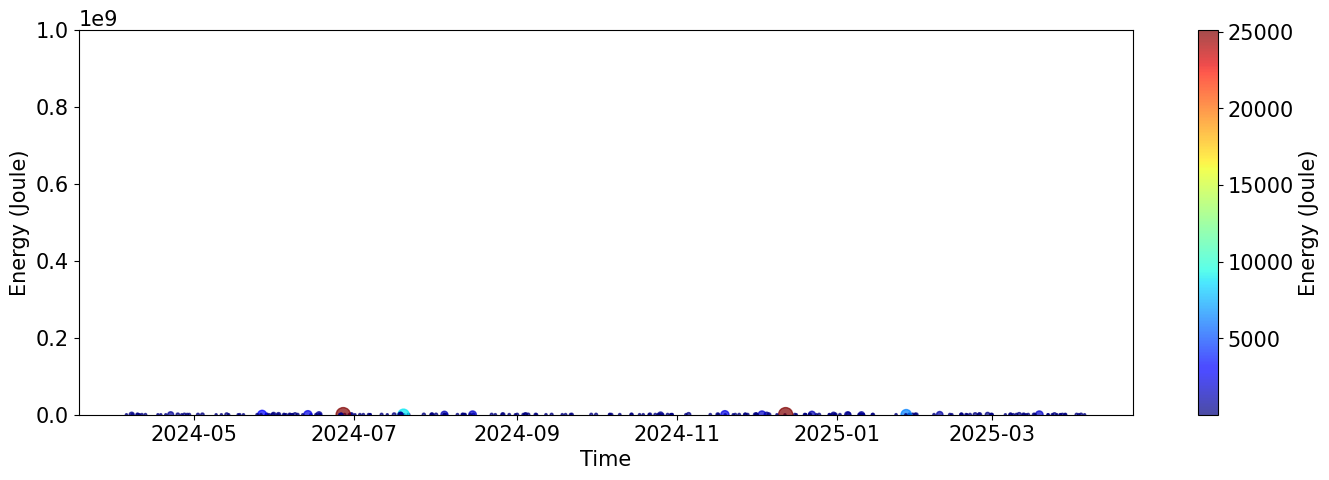

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame oluşturuluyor
data = pd.DataFrame({
    'Time': Marmara2024_PrX.iloc[:, 0].values,
    'Energy (Joule)': Marmara2024_PrX.iloc[:, 5].values
})

# Time sütununu doğru formatta datetime'a çeviriyoruz
data['Time'] = pd.to_datetime(data['Time'], format='%m/%d/%Y %H:%M', dayfirst=False)

# Grafik çizimi
plt.rc('font', size=15)  # Global font boyutu
plt.figure(figsize=(17, 5))

scatter = plt.scatter(
    data['Time'], data['Energy (Joule)'],
    c=data['Energy (Joule)'], cmap='jet',
    s=data['Energy (Joule)']**0.46,  # Nokta büyüklüğü ayarı
    alpha=0.7
)

plt.colorbar(scatter, label='Energy (Joule)')  # Renk skalası
plt.xlabel('Time')
plt.ylabel('Energy (Joule)')
plt.ylim(0, 1e9)  # 10e8 yerine 1e9 daha standart
plt.show()


In [ ]:
x = Marmara2024_PrX.iloc[:,1].values
y = Marmara2024_PrX.iloc[:,2].values
z = Marmara2024_PrX.iloc[:,3].values
colors = Marmara2024_PrX.iloc[:,4].values
sizes = Marmara2024_PrX.iloc[:,4].values*40

In [ ]:
import plotly.graph_objects as go

# Obtain high-resolution world map data online
fig = go.Figure(go.Choroplethmapbox(
    geojson="https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json",
    locations=["USA", "CAN", "MEX", "RUS", "CHN"],  # Example country codes (USA, Canada, Mexico, Russia, China)
    z=[1, 1, 1, 1, 1],  # Values to be assigned to countries (all set to 1)
    colorscale='Jet',  # Color scale name (Viridis, YlGnBu, Jet, etc.)
    zmin=2,
    zmax=6,
    marker_opacity=0.9,  # Opacity of country borders
    marker_line_width=1,  # Thickness of country borders
))

# Create sample earthquake data
earthquake_data = {
    'Longitude': x,
    'Latitude': y,
    'Magnitude': colors,
}

# Add earthquake data with Scatter plot
fig.add_trace(go.Scattermapbox(
    lat=earthquake_data['Latitude'],
    lon=earthquake_data['Longitude'],
    mode='markers',
    marker=dict(
        size=earthquake_data['Magnitude'] * 2.8,  # Set point sizes based on Magnitude value
        color=earthquake_data['Magnitude'],  # Set color scale based on Magnitude value
        colorscale='Jet',  # Color scale name (Viridis, YlGnBu, Jet, etc.)
    ),
))

# Specify map layout and style
fig.update_layout(
    mapbox_style="open-street-map",  # Set map style (for other styles: "open-street-map", "stamen-terrain", etc.)
    mapbox_zoom=6,  # Set map zoom level
    mapbox_center={"lat": 40.500, "lon": 29.0000},  # Set map center (center of the USA)
)

# Increase resolution and font size
fig.update_layout(
    width=1100,  # Set width to increase resolution
    height=450,  # Set height to increase resolution
    font=dict(
        size=25  # Set font size for English comments
    )
)

# Display the plot
fig.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display



# İnteraktif işlev

def plot_3d_scatter(elev, azim, zoom, theta):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet')
    cbar = plt.colorbar(ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet'))
    cbar.set_label('Magnitude')

    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Depth_km')
    ax.dist = zoom  # Zoom ayarı
    ax.azim = theta  # Maus ile çevirme
    plt.show()

# İnteraktif widget'ı oluşturma
elev_slider = widgets.IntSlider(min=0, max=180, value=30, description='Elevation:')
azim_slider = widgets.IntSlider(min=0, max=360, value=30, description='Azimuth:')
zoom_slider = widgets.FloatSlider(min=1, max=10, value=5, description='Zoom:')
theta_slider = widgets.IntSlider(min=0, max=360, value=30, description='Theta:')
interactive_plot = interactive(plot_3d_scatter, elev=elev_slider, azim=azim_slider, zoom=zoom_slider, theta=theta_slider)

# Widget'ı görüntüleme
display(interactive_plot)

interactive(children=(IntSlider(value=30, description='Elevation:', max=180), IntSlider(value=30, description=…